In [1]:
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/yunus/Desktop/Bahar Dersleri/Yapay Zeka Proje/arac-arizadeseni-eslestirme/data/raw/all_data.csv")

In [3]:
def zipf_analysis(text_column, num_words=50):
    # Metinleri birleştirme ve temizleme
    text = ' '.join(text_column).lower()  # Tüm metinleri birleştir ve küçük harfe çevir
    text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretlerini kaldır
    tokens = nltk.word_tokenize(text)  # Kelimelere ayır
    tokens = [token for token in tokens if token.isalpha()]  # Sadece harf içeren kelimeleri al

    # Kelime sıklıklarını hesaplama
    word_counts = Counter(tokens)  # Kelime sıklıklarını say
    most_common_words = word_counts.most_common(num_words)  # En sık geçen kelimeleri al

    # Sıra ve sıklık değerlerini hazırlama
    ranks = np.arange(1, len(most_common_words) + 1)  # Kelime sıralarını oluştur
    frequencies = [count for word, count in most_common_words]  # Kelime sıklıklarını al

    # Log-log grafiği çizimi
    plt.loglog(ranks, frequencies)
    plt.xlabel('Kelime Sırası (log)')
    plt.ylabel('Kelime Sıklığı (log)')
    plt.title('Zipf Yasası Analizi (Ham Veri)')
    plt.show()

    # Veri seti boyutu hakkında bilgi verme
    print(f"Toplam kelime sayısı: {len(tokens)}")
    print(f"Farklı kelime sayısı: {len(word_counts)}")

    if len(tokens) < 10000:
        print("Veri seti, Zipf Yasası analizi için nispeten küçüktür. Sonuçlar sınırlı genellenebilirliğe sahip olabilir.")
    else:
        print("Veri seti, Zipf Yasası analizi için yeterli büyüklüktedir.")

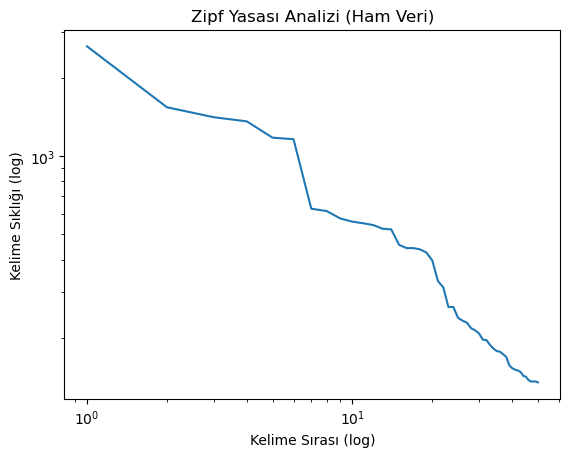

Toplam kelime sayısı: 46258
Farklı kelime sayısı: 4057
Veri seti, Zipf Yasası analizi için yeterli büyüklüktedir.


In [4]:
# Örnek kullanım (df, 'comments')
zipf_analysis(df['comments'])